# Earth Analytics Fall 2018

This is an in class activity notebook
****


## Introduction to Flood Frequency Analysis

One way to analyze time series data - particularly related to events like floods - is to calculate the frequency of different magnitude events. You have have likey heard the term *"100-year flood"*. While you may think it means that it is the size of flood that occurs every 100 years, it actually refers to the flood magnitude that has a probability of exceedance of 1/100 in any given year (i.e., a 1% chance). This is why the hundred year flood event can occur two years in a row.

In this lesson you will learn how "100-year floods" (and other flood frequencies) are calculated using some basic statistics. To begin, let's define two terms:

1. **Exceedance probability:** the probability of a given magnitude event or greater to occur.
    
2. **Recurrence interval:** the average time of exceedance is the inverse of the exceedance probability.
    
### Important Considerations

* The above definitions assume that flood events in the time series are independent (i.e., that event magnitudes are not correlated with each other in time) and that the process is stationary (i.e., that the probability distribution of events is not changing through time).

> In this project, we will be interpreting maximum annual floods. How valid do you think the above assumptions are for annual maxima?

* Even though the phrase "recurrence interval" evokes the idea of regularity in the time between events, this is an important misconception (recall our assumption of independence). The 100-year flood is just as likely to occur after a year that already experienced a 100-yr flood as any other year.

> In this project, we will be asking you to construct and interpret plots of recurrence intervals. Do you think the processes that drive floods are periodic? If so, over what timescales?


The content below comes from <a href="https://water.usgs.gov/edu/100yearflood.html" target= "_blank">this USGS waterscience page</a>. It provides an excellent overview of recurrence intervals and return periods.

****

## What is a Recurrence Interval?

> *100-year floods can happen 2 years in a row*

Statistical techniques, through a process called frequency analysis, are used to estimate the probability of the occurrence of a given precipitation event. The recurrence interval is based on the probability that the given event will be equalled or exceeded in any given year. For example, assume there is a 1 in 50 chance that 6.60 inches of rain will fall in a certain area in a 24-hour period during any given year. Thus, a rainfall total of 6.60 inches in a consecutive 24-hour period is said to have a 50-year recurrence interval. Likewise, using a frequency analysis (Interagency Advisory Committee on Water Data, 1982) there is a 1 in 100 chance that a streamflow of 15,000 cubic feet per second (ft3/s) will occur during any year at a certain streamflow-measurement site. Thus, a peak flow of 15,000 ft3/s at the site is said to have a 100-year recurrence interval. Rainfall recurrence intervals are based on both the magnitude and the duration of a rainfall event, whereas streamflow recurrence intervals are based solely on the magnitude of the annual peak flow.

Ten or more years of data are required to perform a frequency analysis for the determination of recurrence intervals. Of course, the more years of historical data the better—a hydrologist will have more confidence on an analysis of a river with 30 years of record than one based on 10 years of record.

Recurrence intervals for the annual peak streamflow at a given location change if there are significant changes in the flow patterns at that location, possibly caused by an impoundment or diversion of flow. The effects of development (conversion of land from forested or agricultural uses to commercial, residential, or industrial uses) on peak flows is generally much greater for low-recurrence interval floods than for high-recurrence interval floods, such as 25- 50- or 100-year floods. During these larger floods, the soil is saturated and does not have the capacity to absorb additional rainfall. Under these conditions, essentially all of the rain that falls, whether on paved surfaces or on saturated soil, runs off and becomes streamflow.

## How Can We Have two "100-year floods" in less than two years?

This question points out the importance of proper terminology. The term "100-year flood" is used in an attempt to simplify the definition of a flood that statistically has a 1-percent chance of occurring in any given year. Likewise, the term "100-year storm" is used to define a rainfall event that statistically has this same 1-percent chance of occurring. In other words, over the course of 1 million years, these events would be expected to occur 10,000 times. But, just because it rained 10 inches in one day last year doesn't mean it can't rain 10 inches in one day again this year.

Recurrence intervals and probabilities of occurrences Recurrence interval, in years	Probability of occurrence in any given year	Percent chance of occurrence in any given year

|Recurrance interval, in years | Probability of occurrence in any given year| Percent change of occurrence in any given year | 
|100|	1 in 100 |	1 |
|50	|1 in 50	|2|
|25|	1 in 25|	4|
|10|	1 in 10|	10|
|5|	1 in 5	|20|
|==
|2|	1 in 2|	50|

## What is an Annual Exceedance Probability?

The USGS and other agencies often refer to the percent chance of occurrence as an Annual Exceedance Probability or AEP. An AEP is always a fraction of one. So a 0.2 AEP flood has a 20% chance of occurring in any given year, and this corresponds to a 5-year recurrence-interval flood. Recurrence-interval terminology tends to be more understandable for flood intensity comparisons. However, AEP terminology reminds the observer that a rare flood does not reduce the chances of another rare flood within a short time period.

****
## Calculate Probability in Python
In this lesson, you will use streamflow data to explore the probabilities of a different magnitude events (e.g., discharge is measured in cubic feet per second). To do this, you will want long historic records to make your statistical inferences more robust. 

You will use the `hydrofunctions` python package to access streamflow data via an API from the United States Geological Survey (USGS) National Water Information System (NWIS) website. 

To begin, load all of your libraries.

# docs for this api!
https://pypi.org/project/HydroFunctions/


http://earthpy.org/flow.html

In [1]:
import hydrofunctions as hf
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
plt.ion()
# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (11, 6)
# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
# set working dir and import earthpy
import earthpy as et
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## Find A Station of Interest

The `hf.draw_map()` function allows you to explore the station visually in a particular area. Explore the map below. Notice the gage locations in the Boulder, Colorado area. 

For the purposes of this lesson, you will use gage `dv06730500` This gage along Boulder Creek survived the 2013 flood event and is one of the longest time series datasets along Boulder Creek. 

The map below also allows you to explore hydrographs for several stream gages at once if you click on the buttons at the bottom center of the map. 

```python
# create map of stations
hf.draw_map()
```

<iframe src="http://hydrocloud.org/" width="700" height="400"></iframe>


You can get a list of all stations located in Colorado using the `hf.NWIS().get_data()` method. 

In [2]:
# Request data for all stations in Colorado
PR = hf.NWIS(stateCd='CO').get_data()

# List the names for the first 5 sites in Colorado, USA
PR.siteName[0:5]

['COLORADO CREEK NEAR SPICER, CO.',
 'GRIZZLY CREEK NEAR SPICER, CO.',
 'BUFFALO CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR WALDEN, CO']

## Download Stream Gage Data
You are now ready to grab some data from the NWIS API. 

### Mean Daily vs Instantaneous Stream Flow Data

There are two kinds of streamflow time-series data that the USGS provides online: 

1. **Mean daily streamflow:** Mean daily streamflow is useful because it is a complete time series (except for days when the gage fails) and thus retains all recorded streamflow events over the period of record.
1. **Annual maximum instantaneous streamflow:** Instantaneous data is not averaged over the entire day, but instead reflects continuous variations in the flood hydrograph recorded by the stream gage. As such, annual maximum instantaneous streamflow data are useful because they retain the maximum values of discharge recorded in a given year. 

> How do you think flood frequencies characterized by these two different data types will compare?

For this part of the lesson, you will download the mean daily discharge data. The code for this data in `dv` when using the `hydrofunctions` python package. 

### Get Data Using Hydrofunctions API Interface for Python

To begin define a start and end date that you'd like to download. Also define the `site ID`.
Use `USGS 06730500` as your selected site. This stream gage survived the 2013 flood event in Colorado. It also has a long record of measurement that will be helpful when calculating recurrence intervals and exceedance probability values below.  

## Station Selection
In general, to select stream gages for flood frequency analysis you will want to carefully examine the metadata for candidate stations to check for the time period of operation, record completeness, and other comments on gage operation that might impact your interpretation of statistical results (e.g., Is there a dam upstream? When was it built? Other flow diversions? Did the gage malfunction during some events?) 

There are two subsets of USGS gages that have been specially identified for hydo-climatic analyses because station records are of high quality, cover a long time period, and human modification of the watershed is minimal (e.g., due to flow regulation or urban development): (1) Hydro-Climatic Data Network - 2009 (Lins, 2012) and (2) Geospatial attributes of gages for evaluating streamflow (Falcone, 2011).

For this project, we followed the lead of scientists assessing the significance of the 2013 Colorado floods using methods similar to the ones introduced in this project (Yochum, 2015). For more context of data availability along rivers draining the Colorado Front Range, check out Table 2 of this regional flood frequency analysis. 



In [3]:
# define the site number and start and end dates that you are interested in
# play around with different dates or sites if you'd like here!
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'

# then request data for that site and time period 
longmont_resp = hf.get_nwis(site, 'dv', start, end)

### View Site and Metadata Information
You can explore the metadata for the site using the `get_nwis()` function. Below we request the metadata for the site and the "dv" or Daily Value data. Recall from above that dv is the mean daily value. `iv` provides the instantaneous values.

You can also visit the <a href="https://waterdata.usgs.gov/nwis/inventory/?site_no=06730500" target = "_blank">USGS Site page</a> to learn more about this USGS station. 

In [4]:
hf.get_nwis_property(longmont_resp)
# get metadata about the data
hf.get_nwis(site, 'dv').json()

{'name': 'ns1:timeSeriesResponseType',
 'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'value': {'queryInfo': {'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json%2C1.1&sites=06730500&parameterCd=00060',
   'criteria': {'locationParam': '[ALL:06730500]',
    'variableParam': '[00060]',
    'parameter': []},
   'note': [{'value': '[ALL:06730500]', 'title': 'filter:sites'},
    {'value': '[mode=LATEST, modifiedSince=null]',
     'title': 'filter:timeRange'},
    {'value': 'methodIds=[ALL]', 'title': 'filter:methodId'},
    {'value': '2018-09-11T23:10:32.254Z', 'title': 'requestDT'},
    {'value': 'e1bc7ed0-b617-11e8-87eb-6cae8b663fb6', 'title': 'requestId'},
    {'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.',
     'title': 'disclaimer'},
    {'value': 'vaas01', 'title': 'server'}]},
  'timeSeries': [{'sourceInfo': {'siteName': '

Now, request the data. The data will be returned as a `pandas` dataframe.

In [5]:
# get the data in a pandas dataframe format
longmont_discharge = hf.extract_nwis_df(longmont_resp)
longmont_discharge.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


`Hydrofunctions` imports your data into a `pandas` dataframe with a datetime index. However you may find the column headings to be too long. Below you will rename them to keep the code in this lesson simpler.
NOTE: if you are working with many different sites, you'd likely want to keep the column names as they are - with the site ID included.

In [6]:
# rename columns
longmont_discharge.columns = ["discharge", "flag"]
# view first 5 rows
longmont_discharge.head()

,discharge,flag
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


In [7]:
# view last 5 rows of the data
# Note that the 'P' flag indicates that the data is provisional
longmont_discharge.tail()

,discharge,flag
datetime,,
2018-08-25,12.20,P
2018-08-26,8.99,P
2018-08-27,5.52,P
2018-08-28,3.90,P
2018-08-29,4.83,P


## Plot Your Data
Next, plot the time series using `matplotlib`. What do you notice?
There is an unfortunate gap in the data. The good news that while this gap may not work for some analyses, it is acceptable when you calculate a recurrence interval (based on our assumptions of independence and stationarity). 

Note that below I grab the site variable and add it to my plot title using the syntax:

`ax.set_title("Stream Discharge - Station {} \n 1946-2017".format(site))`

where `{}` is a placeholder for the variable that you want to insert into the title and `.format(site)` tells `Python` to grab and format the `site` variable that was defined above.

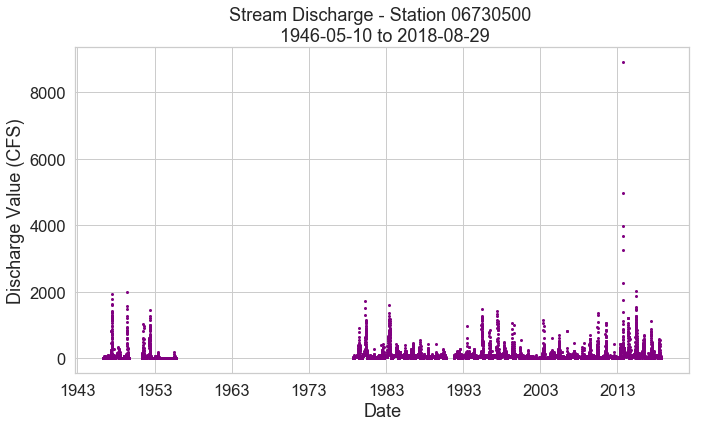

In [8]:
# Plot using matplotlib
fig, ax = plt.subplots(figsize = (11,6))
ax.scatter(x=longmont_discharge.index, 
        y=longmont_discharge["discharge"], 
        marker="o",
        s=4, 
        color ="purple")
ax.set_xlabel("Date")
ax.set_ylabel("Discharge Value (CFS)")
ax.set_title("Stream Discharge - Station {} \n {} to {}".format(site, start, end))
plt.show()


## Annual Maxima

Next you will look at the annual maxima of both instantanoeus and mean daily streamflow. Annual maxima refers to the biggest value that occured within each year. In the case of stream discharge - this is the largest discharge value that was recorded in cubic feet per second (CFS) during each year.

There are two ways we can identify annual maxima for USGS stream gages.

1. You can take the daily mean values to construct a series of the annual maximum value. This is done using `pandas resample` - you learned how to do this in a previous lesson!
2. You can download the instantaneous annual maximum value dataset from <a href="https://nwis.waterdata.usgs.gov/nwis" target = "_blank">USGS  here</a>.

Note that you will compare the data that you download to the analysis of mean dailydata you do below. 
The instantaneous annual maxima data from the USGS is data collected every 5-30 minutes. 

The annual maxima that you derive below uses the mean daily value data that you downloaded above. Do you think you will get the same annual maxima each year?

Let's find out. 

### Add a Year Column to Your Data

Note that below you will add a 'year' column to the longmont discharge data. While this step is not necessary for resampling. It will make your life easier when you plot the data later. 

In [9]:
# Add a year column to your longmont discharge data
longmont_discharge["year"]=longmont_discharge.index.year

# Calculate annual max by resampling
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
longmont_discharge_annual_max.head()

,discharge,flag,year
datetime,,,
1946-01-01,99.0,A,1946.0
1947-01-01,1930.0,A,1947.0
1948-01-01,339.0,A,1948.0
1949-01-01,2010.0,A,1949.0
1950-01-01,NaN,NaN,NaN


### Import USGS Annual Peak Max Data
Next import the USGS annual maxima data. 


In [10]:
# download usgs annual max data from figshare
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "data/colorado-flood/downloads/annual-peak-flow.txt"
urllib.request.urlretrieve(url, download_path)

('data/colorado-flood/downloads/annual-peak-flow.txt',
 <http.client.HTTPMessage at 0x126fcfdd8>)

The data that you are downloading are `tab-delimited`. When you import, be sure to specify 

`sep='\t'`

to ensure that the data download properly. Notice that below the `index_col` for the data is not specified when the data are opened in pandas. This is because you will need to bring in 2 lines of data headers. In pandas, two header rows import as a `multi-index` element. In this particular case it is easier to specify the index after you have removed one line of this `multi-index`.

Your pandas read_csv function will include 4 arguments as follows:


* `download_path`: this is the path where you file is saved
* `header=[1,2]`: this tells pandas to import two header lines - lines 1 and 2 after the skipped rows 
* `sep='\t'`: import the data as a tab delimited file
* `skiprows = 63`: skip the first 63 rows of the data. IF you open the data in a text editor you will notice the entire top of the file is all metadata.
* `parse_dates = [2]`: convert the second column in the data to a datetime format

In [11]:
# open the data using pandas
usgs_annual_max = pd.read_csv(download_path,
                              skiprows = 63,
                              header=[1,2], 
                              sep='\t', 
                              parse_dates = [2])
# notice that the data now have 2 header rows. We only need one - the first row
usgs_annual_max.head()

,agency_cd,site_no,peak_dt,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
,5s,15s,10d,6s,8s,27s,8s,13s,4s,10d,6s,8s,11s
0,USGS,6730500,1927-07-29,06:00,407.0,5,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,6730500,1928-06-04,09:00,694.0,5,3.84,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,6730500,1929-07-23,15:00,530.0,5,3.40,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,6730500,1930-08-18,05:00,353.0,5,2.94,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,6730500,1931-05-29,09:00,369.0,5,2.88,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop one level of index
usgs_annual_max.columns = usgs_annual_max.columns.droplevel(1)

# finally set the date column as the index
usgs_annual_max = usgs_annual_max.set_index(['peak_dt'])

# optional - remove columns we don't need - this is just to make the lesson easier to read
# you can skip this step if you want
usgs_annual_max = usgs_annual_max.drop(["gage_ht_cd", "year_last_pk","ag_dt", "ag_gage_ht", "ag_tm", "ag_gage_ht_cd"], axis=1)

# view cleaned dataframe
usgs_annual_max.head()

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht
peak_dt,,,,,,
1927-07-29,USGS,6730500,06:00,407.0,5,3.00
1928-06-04,USGS,6730500,09:00,694.0,5,3.84
1929-07-23,USGS,6730500,15:00,530.0,5,3.40
1930-08-18,USGS,6730500,05:00,353.0,5,2.94
1931-05-29,USGS,6730500,09:00,369.0,5,2.88


Next, add a year column to your data for easy plotting and make sure that you have only one value per year as expected.

In [13]:
# add a year column to the data for easier plotting
usgs_annual_max["year"] = usgs_annual_max.index.year

# are there any years that have two entries?
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year
peak_dt,,,,,,,
1947-10-15,USGS,6730500,NaN,721.0,5,3.55,1947
1993-10-18,USGS,6730500,NaN,497.0,5,2.76,1993


It looks like you have two years that have more than one data value - 1947 and 1993. For the purpose of this exercise let's only take the largest discharge value from each year. 

In [14]:
# remove duplicate years - keep the max discharge value
usgs_annual_max = usgs_annual_max.sort_values('peak_va', ascending=False).drop_duplicates('year').sort_index()
# if this returns no results you have remove duplicated successfully!
usgs_annual_max[usgs_annual_max.duplicated(subset="year")==True]

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year
peak_dt,,,,,,,


Finally, you are ready to plot the USGS annual max with the calculated annual max derived from your daily mean data. Are they the same? Or Different?

What could cause differences in these two different approaches to getting annual max values?

In [15]:
# plot calculated vs USGS annual max flow values
# you will use the usgs_annual_max and longmont_discharge_annual_max objects to plot your data


## Optional - Difference Bar Plot

To further more quickly explore differences between the USGS annual max data set and the annual max that you calculated using the mean daily value data, you can calculate a difference value between the USGS max value and your annual max calculated from daily mean data. You don't need to do this for your homework however! It's just setup for you to see what the differences look like. 

In [16]:
# merge the two pandas dataframes on the year column
usgs_calculated = pd.merge(longmont_discharge_annual_max, 
                           usgs_annual_max, 
                           left_on="year", 
                           right_on = "year")
# subtract usgs values from your calculated values
usgs_calculated["diff"] = usgs_calculated["peak_va"] - usgs_calculated["discharge"]

Once you have calculated a difference column, create a barplot. 

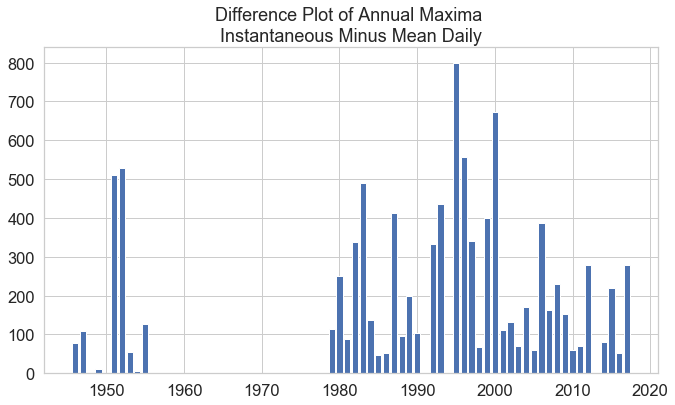

In [17]:
# plot difference - this is not a homework plot. 
fig, ax = plt.subplots(figsize = (11,6))
ax.bar(usgs_calculated["year"], 
       usgs_calculated["diff"])
ax.set_title("Difference Plot of Annual Maxima \nInstantaneous Minus Mean Daily");

## Calculate Return Period

Now that you have both datasets, you are ready to calculate the return period from each. You will calculate this value and the associated probability of each event size for both the USGS max annual flow data and for the max flow value that you derived from the mean daily data.  To calculate return period you will do the following:

1.	Sort your data from smallest to largest.
2.	Calculate exceedance probabilities using the equation below where `n` is length of the record and `i` is the rank.
3.	Calculate the inverse of the exceedance probabilities to determine return period in years.
4.	Plot flood magnitudes against return time. It is common to plot these kinds of data on log-linear or log-log axes. 

****

Exceedance probability equation: 

$$Probablity = \frac{n-i+1}{n+1}$$


where i is the rank order (smallest to largest) from 1 to n. Note that the limits of this equation vary from n/(n+1) ~ 1 for the smallest events and 1/(n+1) for the largest events (i.e., the largest events have a very small exceedance probability). 

****

<i class="fa fa-star"></i> **Data Tip:** If you want to extrapolate beyond the observations that you have - for instance to predict what a 1000 year flood would be given only 100 years of data - then you would need to fit a model to the data.
{: .notice--success}

The steps that you will need to implement are below. 

In [18]:
# sort data smallest to largest
longmont_discharge_sorted = longmont_discharge.sort_values(by = "discharge")
# count total obervations
n = longmont_discharge_sorted.shape[0]
# add a numbered column 1 -> n to use in return calculation for rank
longmont_discharge_sorted.insert(0, 'rank', range(1, 1 + n))
# calculate probability - note you may need to adjust this value based upon the time period of your data
# for daily data you need to divide by 365

longmont_discharge_sorted["probability"] = ((n - longmont_discharge_sorted["rank"] + 1) / (n + 1))
# calculate return - data are daily to then divide by 365?
longmont_discharge_sorted["return-years"] = (1 / longmont_discharge_sorted["probability"]) 

You will ultimately perform the steps above several times for both the discharge data and the precipitation data as a part of your homework. Turning these steps into a function will help you more efficiently process your data. 
An example of what this function could look like is below. For your homework, you will add documentation to this function. 

In [19]:
# Create a function from the workflow below
# you will document this function in your homework

## add an argument for annual vs daily... 
def calculate_return(df, colname):
    '''
    Add Documentation Here
    
    
    '''
    # sort data smallest to largest
    sorted_data = df.sort_values(by = colname)
    # count total obervations
    n = sorted_data.shape[0]
    # add a numbered column 1 -> n to use in return calculation for rank
    sorted_data.insert(0, 'rank', range(1, 1 + n))
    # calculate probability
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    # calculate return - data are daily to then divide by 365?
    sorted_data["return-years"] = (1 / sorted_data["probability"])
    
    return(sorted_data)


Once you have a function, you can calculate return period and probability on both datasets.

In [20]:
longmont_prob = calculate_return(longmont_discharge, "discharge")
# Because these data are daily, divide return period in days by 365 to get a return period in years
longmont_prob["return-years"] = longmont_prob["return-years"] / 365
longmont_prob.tail()

,rank,discharge,flag,year,probability,return-years
datetime,,,,,,
2013-09-16,17078,3270.0,A e,2013,0.000293,9.360548
2013-09-12,17079,3680.0,A,2013,0.000234,11.700685
2013-09-15,17080,3970.0,A e,2013,0.000176,15.600913
2013-09-14,17081,4970.0,A e,2013,0.000117,23.401370
2013-09-13,17082,8910.0,A e,2013,0.000059,46.802740


In [21]:
# calculate the same thing using the USGS annual max data
usgs_annual_prob = calculate_return(usgs_annual_max, "peak_va")
usgs_annual_prob.head()

,rank,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,year,probability,return-years
peak_dt,,,,,,,,,,
1954-01-14,1,USGS,6730500,12:30,26.0,"2,5",NaN,1954,0.984615,1.015625
1932-07-13,2,USGS,6730500,10:00,128.0,5,1.86,1932,0.969231,1.031746
1940-07-03,3,USGS,6730500,NaN,174.0,5,2.34,1940,0.953846,1.048387
1946-07-19,4,USGS,6730500,NaN,178.0,5,2.39,1946,0.938462,1.065574
2002-05-24,5,USGS,6730500,09:15,238.0,5,2.60,2002,0.923077,1.083333



### Plot Event Probability

Below, you plot Discharge on the x-axis and the probability that an event of that size will occur on the y-axis. 

In [22]:
# Compare both datasets
# add your plot here of event probabiliy. you will have peak discharge on the x axis and probability on the y
# you will use the usgs_annual_prob and the longmont_prob objects to create your plots


## Plot Stream Discharge Return Period

And then you plot steram dicharge vs return period. This plot shows you the frequency in years that you can expect an event of any magnitude to occur upon. But remember that this doesn't mean that this size of an event will occur every x years! The probability plot above tells you what the probability is that any event of any size might occur in any particular year. 


In [23]:
# Plot of stream discharge probability
# use the longmont_prob and usgs_annual_prob objects to plot discharge on the y and return-years on the x


### References
Falcone, J. A. (2011). GAGES-II: Geospatial attributes of gages for evaluating streamflow. US Geological Survey.

Lins, H. F. (2012). USGS hydro-climatic data network 2009 (HCDN-2009). US Geological Survey Fact Sheet, 3047(4).

Yochum, S. E. (2015, April). Colorado Front Range Flood of 2013: Peak flows and flood frequencies. In Proceedings of the 3rd Joint Federal Interagency Conference on Sedimentation and Hydrologic Modeling, Reno, NV, USA (pp. 19-23).
